In [15]:
from exocomp import Abund
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

cs = ['#1f77b4', '#ff7f0e', '#d62728','#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [16]:
data = pd.read_csv('Exoplanet_Atmo_Measurements.csv')
exomast = pd.read_csv('exomast_all.csv')

In [3]:
# Convert to O/H, C/H, and Ref/H to standardize solar

data['O/H'] = 0.0
data['C/H'] = 0.0
data['Fe/H'] = 0.0
droplist = [] # In case we want to neglect a data point
for i in range(1,len(data)):
    if data['Retrieval Type'].iloc[i] in ['ForMoSA','HyDRA']:
        droplist.append(i)
        continue
    g = Abund(retrieval = data['Retrieval Type'].iloc[i])
    if data['Planet'].iloc[2] == 'WASP-178 b':
        g.mh_type = 'O/H'
        g.co_type = 'C/H'
    bulk,bulk_err = g.convert_bulk_abundance(data['Metallicity'].iloc[i],data['C/O'].iloc[i])
    data['O/H'].iloc[i] = bulk['O']
    data['C/H'].iloc[i]  = bulk['C']
    data['Fe/H'].iloc[i]  = bulk['Fe']
for i in droplist:
    data = data.drop(i)
    
data.reset_index()

direct = data[data['Geometry'] == 'Direct']
emission = data[data['Geometry'] == 'Eclipse']
transit = data[data['Geometry'] == 'Transit']

# Split off UHJs so we can mark them as special
# Because they are :). Also dissociation...
uhjs = data[data['Planet'].isin(['WASP-18 b','WASP-121 b','WASP-76 b', 'WASP-178 b','MASCARA-1 b'])]

Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Lodders10 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Asplund09 solar abundances
Using Lodd

/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_23874/855836416.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['O/H'].iloc[i] = bulk['O']
/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_23874/855836416.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['C/H'].iloc[i]  = bulk['C']
/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_23874/855836416.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_23874/820944326.py:103: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45)
/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_23874/820944326.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45)


(0.2, 0.9)

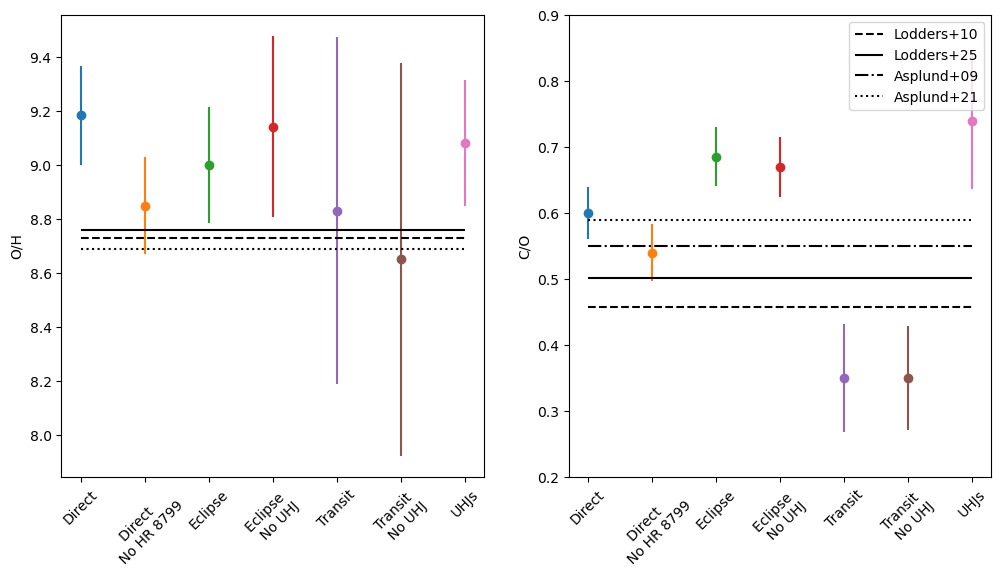

In [4]:
# Plot and print out some properties

def analyze_and_plot_population(data, population_name, ax, print_stats=True):
    """
    Analyze a population dataset and add error bar plots to existing axes.
    
    Parameters:
    -----------
    data : dict or DataFrame
        Dictionary/DataFrame containing the population data with keys:
        'C/O', 'C/O Lower', 'C/O Upper', 'Metallicity', 'Metallicity Lower', 
        'Metallicity Upper', 'Mass', 'T_eq', 'O/H', 'C/H'
    population_name : str
        Name of the population for labeling (e.g., 'Eclipse', 'Transit', 'UHJs')
    ax : array of matplotlib axes
        Array with at least 2 axes: ax[0] for O/H plot, ax[1] for C/O plot
    print_stats : bool, optional
        Whether to print statistics (default True)
    
    Returns:
    --------
    dict : Dictionary containing all calculated statistics
    """
    
    # Calculate weighted averages
    co_weights = 1/np.max([data['C/O Lower'], data['C/O Upper']], axis=0)
    mh_weights = 1/np.max([data['Metallicity Lower'], data['Metallicity Upper']], axis=0)
    
    avg_co = np.average(data['C/O'], weights=co_weights)
    avg_mh = np.average(data['Metallicity'], weights=mh_weights)
    avg_mass = np.average(data['Mass'])
    avg_temp = np.average(data['T_eq'])
    avg_oh = np.average(data['O/H'])
    avg_ch = np.average(data['C/H'])
    
    # Calculate medians
    med_oh = np.median(data['O/H'])
    med_ch = np.median(data['C/H'])
    med_co = np.median(data['C/O'])
    med_mh = np.median(data['Metallicity'])
    med_mass = np.median(data['Mass'])
    med_temp = np.median(data['T_eq'])
    
    # Print statistics if requested
    if print_stats:
        print(f'{population_name} Spectroscopy: Average C/O = {avg_co:.3f}, Average M/H = {avg_mh:.3f}, Mass = {avg_mass:.2f}, Temp = {avg_temp:.1f}')
        print(f'{population_name} Spectroscopy: Median C/O = {med_co:.3f}, Median M/H = {med_mh:.3f}, Mass = {med_mass:.2f}, Temp = {med_temp:.1f}')
        print(f'{population_name} Spectroscopy: Average O/H = {avg_oh:.3f}, Average C/H = {avg_ch:.3f}')
        print(f'{population_name} Spectroscopy: Median O/H = {med_oh:.3f}, Median C/H = {med_ch:.3f}')
    
    # Add error bar plots
    oh_err = np.std(data['O/H']) / np.sqrt(len(data['O/H']))
    co_err = np.std(data['C/O']) / np.sqrt(len(data['C/O']))
    
    ax[0].errorbar(population_name, avg_oh, yerr=oh_err, fmt='o')
    ax[1].errorbar(population_name, med_co, yerr=co_err, fmt='o')
    
    # Return all statistics as a dictionary
    stats = {
        'avg_co': avg_co, 'avg_mh': avg_mh, 'avg_mass': avg_mass, 'avg_temp': avg_temp,
        'avg_oh': avg_oh, 'avg_ch': avg_ch, 'med_oh': med_oh, 'med_ch': med_ch,
        'med_co': med_co, 'med_mh': med_mh, 'med_mass': med_mass, 'med_temp': med_temp
    }
    
    return stats

fig,ax = plt.subplots(1,2,figsize=(12,6))

direct_stats = analyze_and_plot_population(direct, 'Direct', ax, print_stats=False)

data_nohr8799 = data[~data['Planet'].isin(['HR 8799 b','HR 8799 c','HR 8799 d','HR 8799 e'])]
direct_nohr8799 = data_nohr8799[(data_nohr8799['Geometry'] == 'Direct')]
direct_nohr8799_stats = analyze_and_plot_population(direct_nohr8799, 'Direct \n No HR 8799', ax, print_stats=False)

emission_stats = analyze_and_plot_population(emission, 'Eclipse', ax, print_stats=False)

data_nouhj = data[~data['Planet'].isin(['WASP-18 b','WASP-121 b','WASP-76 b', 'WASP-178 b','MASCARA-1 b'])]
data_nouhj.reset_index()
emission_nouhj = data_nouhj[(data_nouhj['Geometry'] == 'Eclipse')]
emission_nouhj_stats = analyze_and_plot_population(emission_nouhj, 'Eclipse \n No UHJ', ax, print_stats=False)

transit_stats = analyze_and_plot_population(transit, 'Transit', ax, print_stats=False)
transit_nouhj = data_nouhj[(data_nouhj['Geometry'] == 'Transit')]
transit_nouhj_stats = analyze_and_plot_population(transit_nouhj, 'Transit \n No UHJ', ax, print_stats=False)

uhjs_stats = analyze_and_plot_population(uhjs, 'UHJs', ax, print_stats=False)

ax[0].hlines(8.73,0,6,'k',linestyle='--',label='Lodders+10')
ax[0].hlines(8.76,0,6,'k',linestyle='-',label='Lodders+25')
ax[0].hlines(8.69,0,6,'k',linestyle=':',label='Asplund+09/21')

ax[1].hlines(10**8.39/10**8.73,0,6,'k',linestyle='--',label='Lodders+10')
ax[1].hlines(10**8.46/10**8.76,0,6,'k',linestyle='-',label='Lodders+25')
ax[1].hlines(10**8.43/10**8.69,0,6,'k',linestyle='-.',label='Asplund+09')
ax[1].hlines(10**8.46/10**8.69,0,6,'k',linestyle=':',label='Asplund+21')

ax[0].set_ylabel('O/H')
ax[1].set_ylabel('C/O')

ax[1].legend(frameon=True)


ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45)

ax[1].set_ylim(0.2,0.9)


{'avg_co': 0.5957799418512881,
 'avg_mh': 0.9027667579307056,
 'avg_mass': 1.2662866999999998,
 'avg_temp': 1394.6,
 'avg_oh': 9.0092654641,
 'avg_ch': 8.613041825972335,
 'med_oh': 9.599999999999998,
 'med_ch': 9.109877588626738,
 'med_co': 0.44499999999999995,
 'med_mh': 1.005,
 'med_mass': 0.635,
 'med_temp': 1371.0}

{'avg_co': 0.6786126592356687,
 'avg_mh': -0.0947741378854974,
 'avg_mass': 2.5758375,
 'avg_temp': 2143.625,
 'avg_oh': 8.741249999999999,
 'avg_ch': 8.532549109629846,
 'med_oh': 8.44,
 'med_ch': 8.297164879872616,
 'med_co': 0.635,
 'med_mh': -0.25,
 'med_mass': 1.412,
 'med_temp': 2337.5}

/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_23874/2107436273.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45)
/var/folders/mv/w837twcj1x15d56059x6tb640005r5/T/ipykernel_23874/2107436273.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45)


,Planet,Reference,Status,Geometry,Obs,C/O,C/O Lower,C/O Upper,Metallicity,Metallicity Lower,...,R/V Lower,R/V Upper,R/V Type,Retrieval Type,Notes,Mass,T_eq,O/H,C/H,Fe/H
0,WASP-18 b,Brogi et al. 2023,Published,Eclipse,Gemini/IGRINS,0.34,0.34,0.00,0.48,0.29,...,NaN,NaN,NaN,CHIMERA,NaN,10.2000,2504,9.17,8.701479,7.98
1,WASP-77A b,Line et al. 2022,Published,Eclipse,Gemini/IGRINS,0.59,0.08,0.08,-0.49,0.12,...,NaN,NaN,NaN,CHIMERA,NaN,1.6670,1691,8.20,7.970852,7.01
2,WASP-77A b,Reggiani et al. 2022,Published,Eclipse,Gemini/IGRINS,0.59,0.08,0.08,-0.72,0.12,...,NaN,NaN,NaN,CHIMERA,NaN,1.6670,1691,7.97,7.740852,6.78
3,WASP-121 b,Smith et al. 2024,Published,Eclipse,Gemini/IGRINS,0.70,0.10,0.07,-0.17,0.33,...,0.248745,0.288957,R/O,CHIMERA,NaN,1.1570,2449,8.52,8.365098,7.33
4,WASP-127 b,Kanumalla et al. 2024,Published,Eclipse,Gemini/IGRINS,0.68,0.68,0.00,1.59,0.30,...,NaN,NaN,NaN,CHIMERA,NaN,0.1647,1422,10.28,10.112509,9.09
5,WASP-76 b,Mansfield et al. 2024,Published,Eclipse,Gemini/IGRINS,0.59,0.14,0.13,-0.74,0.17,...,NaN,NaN,NaN,sCHIMERA,NaN,0.8940,2226,7.95,7.720852,6.76
6,WASP-121 b,Pelletier et al. 2024,Published,Eclipse,VLT/CRIRES++VLT/ESPRESSO,0.87,0.06,0.04,0.79,0.26,...,0.138767,0.147664,Fe/O,SCARLET,NaN,1.1570,2449,9.48,9.419519,8.29
7,MASCARA-1 b,Ramkumar et al. 2025,Published,Eclipse,VLT/CRIRES+,0.74,0.14,0.11,-0.33,0.00,...,1.490000,1.170000,Fe/(C+O),Gibson,Pre+Post Eclipse- ref/vol from free chem,3.7000,2717,8.36,8.229232,7.17


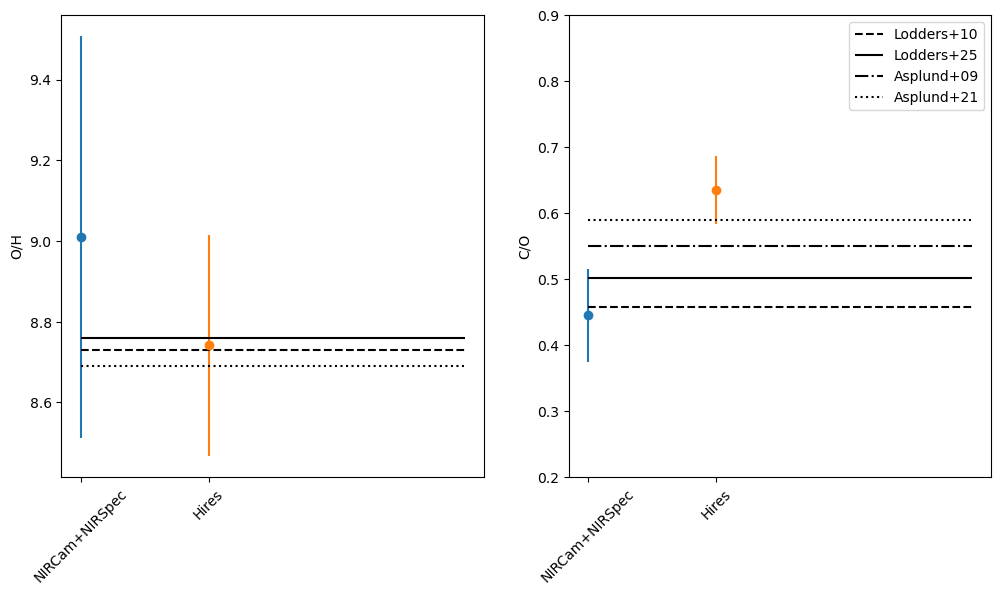

In [5]:
# 
data_nircam = data[data['Obs'].str.contains("NIRCam")]
data_nirspec = data[data['Obs'].str.contains("NIRSpec")]

data_nir = pd.concat([data_nircam,data_nirspec]).drop_duplicates().reset_index(drop=True)

#hires
data_gemini = data[data['Obs'].str.contains("Gemini")]
data_espresso = data[data['Obs'].str.contains("ESPRESSO")]
data_crires = data[data['Obs'].str.contains("CRIRES")]
data_hires = pd.concat([data_gemini,data_espresso,data_crires]).drop_duplicates().reset_index(drop=True)

data['Obs']

fig,ax = plt.subplots(1,2,figsize=(12,6))

display(analyze_and_plot_population(data_nir, 'NIRCam+NIRSpec', ax, print_stats=False))
display(analyze_and_plot_population(data_hires, 'Hires', ax, print_stats=False))

ax[0].hlines(8.73,0,3,'k',linestyle='--',label='Lodders+10')
ax[0].hlines(8.76,0,3,'k',linestyle='-',label='Lodders+25')
ax[0].hlines(8.69,0,3,'k',linestyle=':',label='Asplund+09/21')

ax[1].hlines(10**8.39/10**8.73,0,3,'k',linestyle='--',label='Lodders+10')
ax[1].hlines(10**8.46/10**8.76,0,3,'k',linestyle='-',label='Lodders+25')
ax[1].hlines(10**8.43/10**8.69,0,3,'k',linestyle='-.',label='Asplund+09')
ax[1].hlines(10**8.46/10**8.69,0,3,'k',linestyle=':',label='Asplund+21')

ax[0].set_ylabel('O/H')
ax[1].set_ylabel('C/O')

ax[1].legend(frameon=True)


ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=45)
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation=45)

ax[1].set_ylim(0.2,0.9)

data_hires

In [6]:
data_nohr8799 = data[~data['Planet'].isin(['HR 8799 b','HR 8799 c','HR 8799 d','HR 8799 e'])]
direct_nohr8799 = data_nohr8799[(data_nohr8799['Geometry'] == 'Direct')]
direct_nohr8799_stats = analyze_and_plot_population(direct_nohr8799, 'Direct \n No HR 8799', ax, print_stats=False)


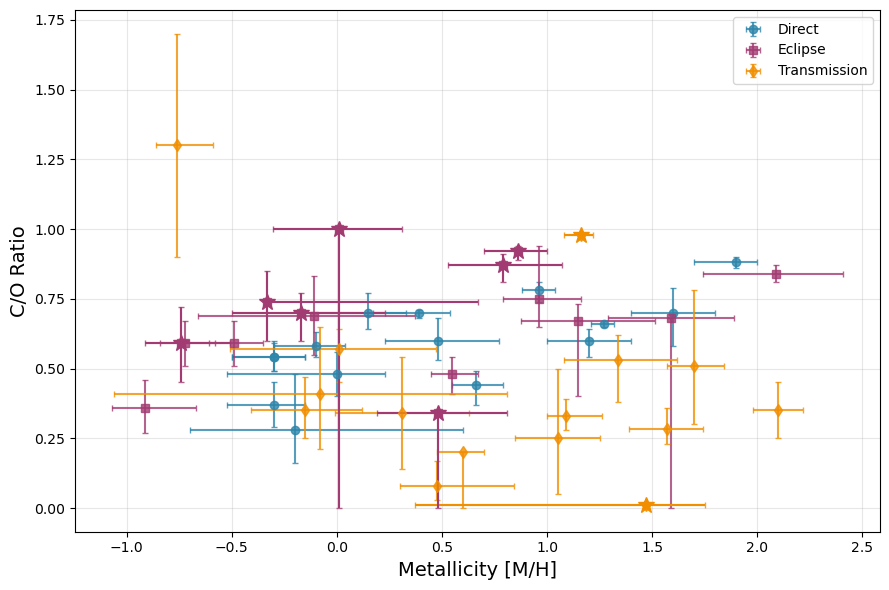

In [7]:
fig, ax = plt.subplots(figsize=(9, 6))

for d, label, marker, color in zip([direct, emission, transit], 
                                     ['Direct', 'Eclipse', 'Transmission','UHJ'],
                                     ['o', 's', 'd', '*'],
                                     ['#2E86AB', '#A23B72', '#F18F01', 'grey']):
    ax.errorbar(d['Metallicity'], d['C/O'],
                xerr=[d['Metallicity Lower'], d['Metallicity Upper']],
                yerr=[d['C/O Lower'], d['C/O Upper']],
                fmt=marker, label=label, color=color,
                markersize=6, capsize=2, alpha=0.8)

for _, row in uhjs.iterrows():
    color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01'}
    ax.errorbar(row['Metallicity'], row['C/O'],
                xerr=[[row['Metallicity Lower']], [row['Metallicity Upper']]],
                yerr=[[row['C/O Lower']], [row['C/O Upper']]],
                fmt='*', color=color_map[row['Geometry']], markersize=12)

ax.set_xlabel('Metallicity [M/H]', fontsize=14)
ax.set_ylabel('C/O Ratio', fontsize=14)
ax.legend(frameon=True, fancybox=True, shadow=False)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
from scipy import stats
display(stats.pearsonr(direct['Metallicity'],direct['C/O']))
display(stats.pearsonr(emission['Metallicity'],emission['C/O']))
display(stats.pearsonr(transit['Metallicity'],transit['C/O']))

PearsonRResult(statistic=0.697775567972362, pvalue=0.0038233624707888596)

PearsonRResult(statistic=0.38379940376874133, pvalue=0.14222232436829152)

PearsonRResult(statistic=-0.3782302010213662, pvalue=0.1645024356600337)

In [9]:
def weighted_correlation(x, y, sigma_x, sigma_y, verbose=True):
    """Calculate weighted Pearson correlation coefficient with uncertainties in both x and y"""
    # Combined weights from both uncertainties
    weights = 1 / (sigma_x**2 + sigma_y**2)
    # Weighted means
    x_mean = np.average(x, weights=weights)
    y_mean = np.average(y, weights=weights)
    
    # Weighted covariance and variances
    cov = np.average((x - x_mean) * (y - y_mean), weights=weights)
    var_x = np.average((x - x_mean)**2, weights=weights)
    var_y = np.average((y - y_mean)**2, weights=weights)
    
    # Correlation coefficient
    cc = cov / np.sqrt(var_x * var_y)
    if verbose:
        print(cc)
    return cc

def wrap_weighted_correlation(d,v1='Metallicity',v2='C/O'):
    wc = weighted_correlation(d[v1],d[v2],
                     np.max([d[f'{v1} Lower'].values,d[f'{v1} Upper'].values],axis=0),
                     np.max([d[f'{v2} Lower'].values,d[f'{v2} Upper'].values],axis=0))
    return wc

wrap_weighted_correlation(data)
wrap_weighted_correlation(direct)
wrap_weighted_correlation(direct_nohr8799)
wrap_weighted_correlation(emission)
wrap_weighted_correlation(transit)

0.19434571445080398
0.5967861475014926
0.3196817346807854
0.5279030011715378
-0.12461686664669004


-0.12461686664669004

In [10]:
weighted_correlation(data['Metallicity'],data['C/O'],
                     np.max([data['Metallicity Lower'].values,data['Metallicity Upper'].values],axis=0),
                     np.max([data['C/O Lower'].values,data['C/O Upper'].values],axis=0))
weighted_correlation(direct['Metallicity'],direct['C/O'],
                     np.max([direct['Metallicity Lower'].values,direct['Metallicity Upper'].values],axis=0),
                     np.max([direct['C/O Lower'].values,direct['C/O Upper'].values],axis=0))
weighted_correlation(emission['Metallicity'],emission['C/O'],
                     np.max([emission['Metallicity Lower'].values,emission['Metallicity Upper'].values],axis=0),
                     np.max([emission['C/O Lower'].values,emission['C/O Upper'].values],axis=0))
weighted_correlation(transit['Metallicity'],transit['C/O'],
                     np.max([transit['Metallicity Lower'].values,transit['Metallicity Upper'].values],axis=0),
                     np.max([transit['C/O Lower'].values,transit['C/O Upper'].values],axis=0))

weighted_correlation(direct_nohr8799['Metallicity'],direct_nohr8799['C/O'],
                     np.max([direct_nohr8799['Metallicity Lower'].values,direct_nohr8799['Metallicity Upper'].values],axis=0),
                     np.max([direct_nohr8799['C/O Lower'].values,direct_nohr8799['C/O Upper'].values],axis=0))

0.19434571445080398
0.5967861475014926
0.5279030011715378
-0.12461686664669004
0.3196817346807854


0.3196817346807854

In [11]:
weighted_correlation(data['Mass'],data['C/O'],
                     np.ones(len(data['Mass'])),
                     np.max([data['C/O Lower'].values,data['C/O Upper'].values],axis=0))
weighted_correlation(direct['Mass'],direct['C/O'],
                     np.ones(len(direct['Mass'])),
                     np.max([direct['C/O Lower'].values,direct['C/O Upper'].values],axis=0))
weighted_correlation(direct_nohr8799['Mass'],direct_nohr8799['C/O'],
                     np.ones(len(direct_nohr8799['Mass'])),
                     np.max([direct_nohr8799['C/O Lower'].values,direct_nohr8799['C/O Upper'].values],axis=0))
weighted_correlation(emission['Mass'],emission['C/O'],
                     np.ones(len(emission['Mass'])),
                     np.max([emission['C/O Lower'].values,emission['C/O Upper'].values],axis=0))
weighted_correlation(transit['Mass'],transit['C/O'],
                     np.ones(len(transit['Mass'])),
                     np.max([transit['C/O Lower'].values,transit['C/O Upper'].values],axis=0))

0.07082578108904833
-0.0036075614669182506
0.33563462392764154
-0.16646534814785183
0.009661729227869563


0.009661729227869563

In [12]:
weighted_correlation(data['Mass'],data['Metallicity'],
                     np.ones(len(data['Mass'])),
                     np.max([data['Metallicity Lower'].values,data['Metallicity Upper'].values],axis=0))
weighted_correlation(direct['Mass'],direct['Metallicity'],
                     np.ones(len(direct['Mass'])),
                     np.max([direct['Metallicity Lower'].values,direct['Metallicity Upper'].values],axis=0))
weighted_correlation(direct_nohr8799['Mass'],direct_nohr8799['Metallicity'],
                     np.ones(len(direct_nohr8799['Mass'])),
                     np.max([direct_nohr8799['Metallicity Lower'].values,direct_nohr8799['Metallicity Upper'].values],axis=0))
weighted_correlation(emission['Mass'],emission['Metallicity'],
                     np.ones(len(emission['Mass'])),
                     np.max([emission['Metallicity Lower'].values,emission['Metallicity Upper'].values],axis=0))
weighted_correlation(transit['Mass'],transit['Metallicity'],
                     np.ones(len(transit['Mass'])),
                     np.max([transit['Metallicity Lower'].values,transit['Metallicity Upper'].values],axis=0))

-0.24096238775085918
-0.5075166310265584
-0.38638601833867564
-0.2078496807369841
-0.3445418138340077


-0.3445418138340077

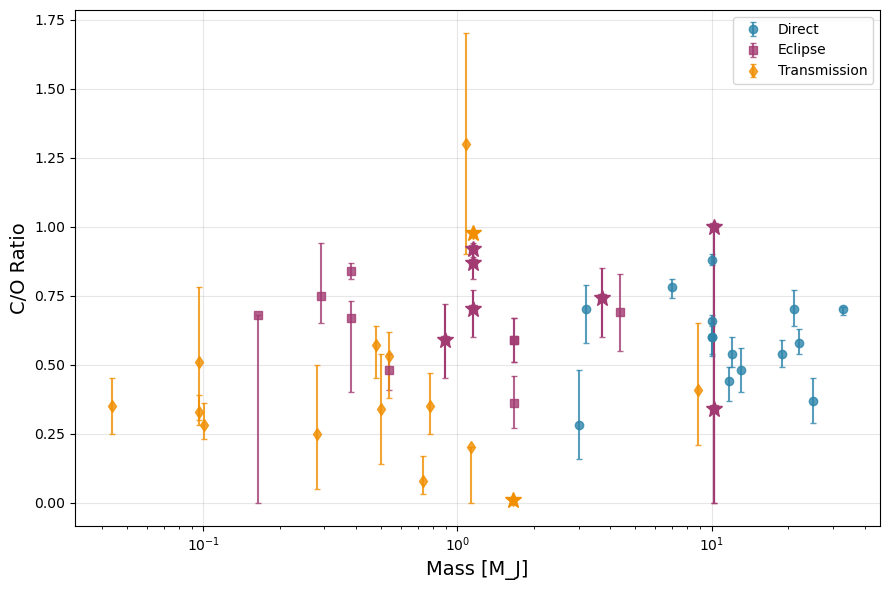

In [13]:
fig, ax = plt.subplots(figsize=(9, 6))

for data, label, marker, color in zip([direct, emission, transit], 
                                     ['Direct', 'Eclipse', 'Transmission','UHJ'],
                                     ['o', 's', 'd', '*'],
                                     ['#2E86AB', '#A23B72', '#F18F01', 'grey']):
    ax.errorbar(data['Mass'], data['C/O'],
                #xerr=[data['Metallicity Lower'], data['Metallicity Upper']],
                yerr=[data['C/O Lower'], data['C/O Upper']],
                fmt=marker, label=label, color=color,
                markersize=6, capsize=2, alpha=0.8)

for _, row in uhjs.iterrows():
    color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01'}
    ax.errorbar(row['Mass'], row['C/O'],
                #xerr=[[row['Metallicity Lower']], [row['Metallicity Upper']]],
                yerr=[[row['C/O Lower']], [row['C/O Upper']]],
                fmt='*', color=color_map[row['Geometry']], markersize=12)

ax.set_xscale('log')

ax.set_xlabel('Mass [M_J]', fontsize=14)
ax.set_ylabel('C/O Ratio', fontsize=14)
ax.legend(frameon=True, fancybox=True, shadow=False)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

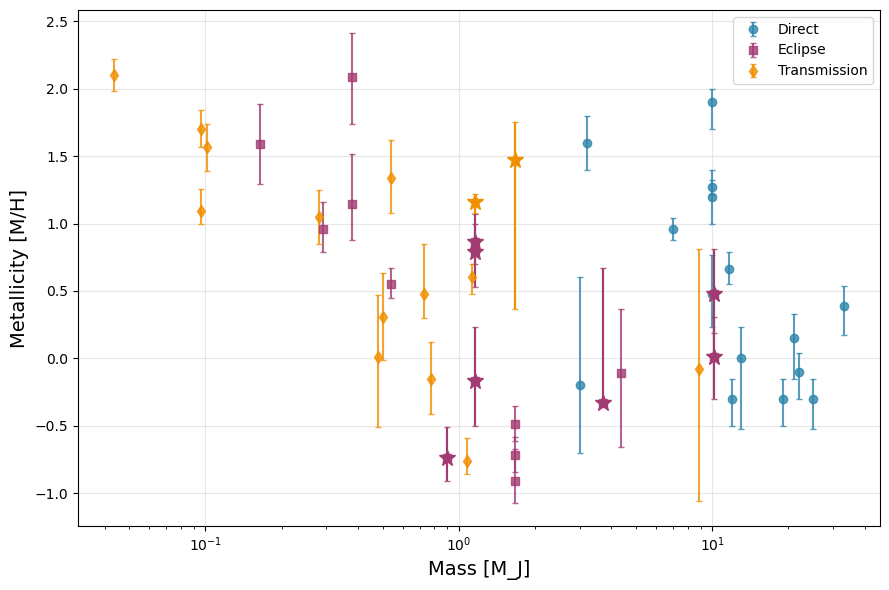

In [14]:
fig, ax = plt.subplots(figsize=(9, 6))

for data, label, marker, color in zip([direct, emission, transit], 
                                     ['Direct', 'Eclipse', 'Transmission','UHJ'],
                                     ['o', 's', 'd', '*'],
                                     ['#2E86AB', '#A23B72', '#F18F01', 'grey']):
    ax.errorbar(data['Mass'], data['Metallicity'],
                #xerr=[data['Metallicity Lower'], data['Metallicity Upper']],
                yerr=[data['Metallicity Lower'], data['Metallicity Upper']],
                fmt=marker, label=label, color=color,
                markersize=6, capsize=2, alpha=0.8)

for _, row in uhjs.iterrows():
    color_map = {'Direct': '#2E86AB', 'Eclipse': '#A23B72', 'Transit': '#F18F01'}
    ax.errorbar(row['Mass'], row['Metallicity'],
                #xerr=[[row['Metallicity Lower']], [row['Metallicity Upper']]],
                yerr=[[row['Metallicity Lower']], [row['Metallicity Upper']]],
                fmt='*', color=color_map[row['Geometry']], markersize=12)

ax.set_xscale('log')

ax.set_xlabel('Mass [M_J]', fontsize=14)
ax.set_ylabel('Metallicity [M/H]', fontsize=14)
ax.legend(frameon=True, fancybox=True, shadow=False)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()